# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

Math behind this can be found here: https://www.notion.so/cweniger/The-math-of-contrastive-learning-6991de9a04c74d84be61239717fdb57c

## Purpose

- Prototype for systematically test and compare density estimation models

In [1]:
import numpy as np
import pylab as plt
import swyft

In [2]:
def model(z, sigma = 0.01):
    x = np.linspace(-5, 5, 10)
    t = np.sin(x)*z[0]
    n = np.random.randn(*t.shape)*sigma
    return t + n

x0 = model(np.ones(50)*0.5, sigma = 1e-10)

In [3]:
sw = swyft.SWYFT(model, 50, x0, device = 'cuda:0')

In [4]:
sw.round(n_sims = 1000, n_train = 1000, lr = 1e-4)
sw.round(n_sims = 1000, n_train = 1000, lr = 1e-4)
sw.round(n_sims = 1000, n_train = 1000, lr = 1e-4)
sw.round(n_sims = 1000, n_train = 1000, lr = 1e-4)

100%|██████████| 1000/1000 [00:00<00:00, 11144.72it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)



  0%|          | 0/1000 [00:00<?, ?it/s]

Network optimization


100%|██████████| 1000/1000 [00:29<00:00, 33.63it/s]


Round:  1
Generate samples from constrained prior: z~pc(z)


100%|██████████| 1000/1000 [00:00<00:00, 9201.75it/s]

Generate corresponding draws x ~ p(x|z)



  0%|          | 4/1000 [00:00<00:26, 37.62it/s]

Network optimization


100%|██████████| 1000/1000 [00:29<00:00, 33.78it/s]


Round:  2
Generate samples from constrained prior: z~pc(z)


100%|██████████| 1000/1000 [00:00<00:00, 9113.65it/s]

Generate corresponding draws x ~ p(x|z)



  0%|          | 4/1000 [00:00<00:25, 38.85it/s]

Network optimization


100%|██████████| 1000/1000 [00:29<00:00, 33.99it/s]


Round:  3
Generate samples from constrained prior: z~pc(z)


100%|██████████| 1000/1000 [00:00<00:00, 12224.41it/s]

Generate corresponding draws x ~ p(x|z)



  0%|          | 4/1000 [00:00<00:26, 38.18it/s]

Network optimization


100%|██████████| 1000/1000 [00:29<00:00, 34.12it/s]


In [5]:
post0 = sw.get_posteriors(nround=0)
post1 = sw.get_posteriors(nround=1)
post2 = sw.get_posteriors(nround=2)
post3 = sw.get_posteriors(nround=3)

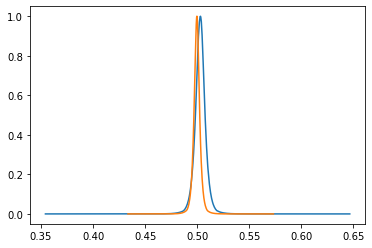

In [6]:
#plt.plot(post0[0]['z'], np.exp(post0[0]['lnL']))
#plt.plot(post1[0]['z'], np.exp(post1[0]['lnL']))
plt.plot(post2[0]['z'], np.exp(post2[0]['lnL']))
plt.plot(post3[0]['z'], np.exp(post3[0]['lnL']))